# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# downloading the data.
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-01-24 19:32:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   115KB/s    in 0.6s    

2022-01-24 19:32:36 (115 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv('data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
new_df = df[features]

In [6]:
new_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


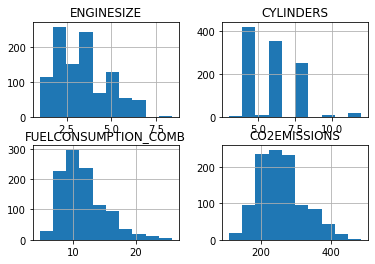

In [7]:
new_df.hist()
plt.show()

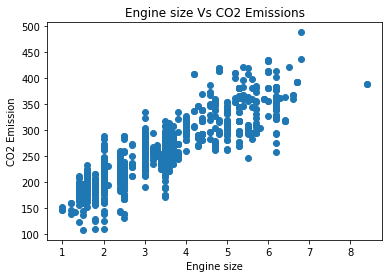

In [8]:
# scatter plot of engine size vs co2 emissions.
plt.scatter(new_df['ENGINESIZE'], new_df['CO2EMISSIONS'])
plt.xlabel('Engine size')
plt.ylabel('CO2 Emission')
plt.title('Engine size Vs CO2 Emissions')
plt.show()

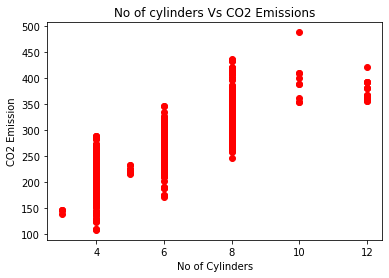

In [9]:
# scatter plot of no of cylinders vs co2 emissions.
plt.scatter(new_df['CYLINDERS'], new_df['CO2EMISSIONS'], color='red')
plt.xlabel('No of Cylinders')
plt.ylabel('CO2 Emission')
plt.title('No of cylinders Vs CO2 Emissions')
plt.show()

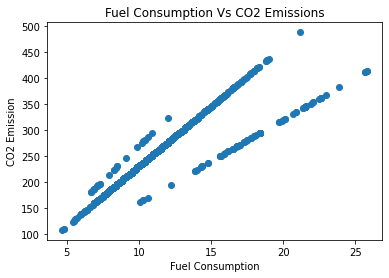

In [10]:
# scatter plot of Fuel Consumption vs co2 emissions.
plt.scatter(new_df['FUELCONSUMPTION_COMB'], new_df['CO2EMISSIONS'])
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.title('Fuel Consumption Vs CO2 Emissions')
plt.show()

In [11]:
# splitting the data set into 80% for training and 20% for testing.
mask = np.random.rand(len(new_df)) < 0.8
train = new_df[mask]
test = new_df[~mask]

In [12]:
train.shape

(831, 4)

In [13]:
test.shape

(236, 4)

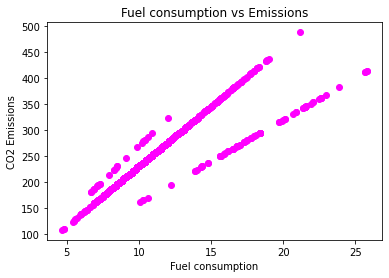

In [14]:
# training data distribution. (fuel consumption vs Emissions)
plt.scatter(new_df['FUELCONSUMPTION_COMB'], new_df['CO2EMISSIONS'], color='magenta')
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 Emissions')
plt.title('Fuel consumption vs Emissions')
plt.show()

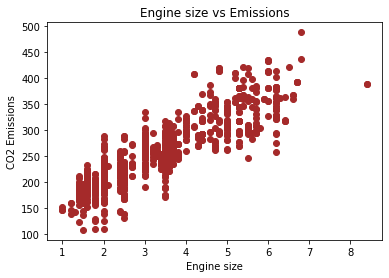

In [15]:
# training data distribution. (Engine size vs Emissions)
plt.scatter(new_df['ENGINESIZE'], new_df['CO2EMISSIONS'], color='brown')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')
plt.title('Engine size vs Emissions')
plt.show()

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# fitting training set into the model.
regr.fit(train_x, train_y)

LinearRegression()

In [17]:
# getting the hypotheses.

print("coefficients : ", regr.coef_)

print("intercept : ", regr.intercept_)

coefficients :  [[39.08647754]]
intercept :  [125.1008007]


In [18]:
# so our hypotheses is 
print(f"H(X) = {regr.intercept_[0]} + {regr.coef_[0][0]} * X")

# so 
print(f"CO2EMISSIONS = {regr.intercept_[0]} + {regr.coef_[0][0]} * ENGINESIZE")

H(X) = 125.10080069863952 + 39.08647754479142 * X
CO2EMISSIONS = 125.10080069863952 + 39.08647754479142 * ENGINESIZE


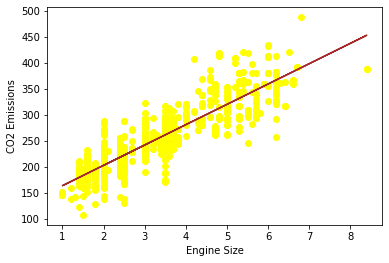

In [19]:
# plotting the fit line over the data.
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='yellow')
# plotting the hypothesis (straight line in this case.)
plt.plot(train_x, regr.intercept_[0] + regr.coef_[0][0] * train_x, color='brown')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [20]:
# model evalutation.
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


predict_y = regr.predict(test_x)

print("Actual values : \n", test_y.flatten())

print()

print("Model predictions: \n", predict_y.flatten())

Actual values : 
 [136 239 230 230 214 288 258 336 336 407 354 285 281 297 209 437 181 181
 221 230 193 246 292 292 338 209 255 274 290 225 228 221 235 251 248 253
 262 340 340 338 294 340 276 192 290 272 347 344 380 362 435 221 235 269
 277 173 182 182 159 317 317 317 294 193 232 242 222 320 198 168 168 255
 259 182 156 396 225 221 230 346 235 402 283 283 336 315 308 184 294 179
 184 216 126 244 229 228 283 366 380 432 269 292 270 285 276 259 290 354
 317 186 209 110 265 198 267 264 145 232 265 255 267 267 294 281 285 306
 301 248 225 209 225 235 278 250 225 225 294 184 193 216 200 175 276 253
 271 209 260 361 334 345 239 253 223 283 260 235 207 352 334 301 186 168
 235 216 216 242 352 304 212 301 242 235 267 297 407 350 278 356 292 380
 361 175 179 196 184 196 191 207 147 269 283 186 253 179 359 327 248 251
 274 212 225 320 251 286 393 193 218 184 221 196 258 198 228 269 301 196
 221 189 170 191 110 126 384 310 373 163 221 200 232 197 283 248 223 271
 271 260]

Model predictions: 
 [

In [21]:
# model metrics.

# R2 score.

print("r2 score : %.2f" % r2_score(test_y, predict_y))

r2 score : 0.75


In [22]:
# Mean Absolute Error : 
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y - predict_y)))

Mean Absolute Error: 24.68


In [23]:
# Mean Squared Error or Residual sum of squares.
print("Mean Squared Error %.2f" % np.mean(np.absolute((test_y - predict_y) ** 2)))

Mean Squared Error 1018.70
